In [37]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('data/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [39]:
df.shape

(13320, 9)

In [40]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [41]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [42]:
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [43]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [44]:
df1=df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [45]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [46]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [47]:
df[df['size']=='1 RK']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,25.25
782,Super built-up Area,Ready To Move,Thanisandra,1 RK,Bhmesy,445,1.0,0.0,28.00
1363,Super built-up Area,21-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,1.0,25.25
2486,Super built-up Area,19-Dec,Bhoganhalli,1 RK,Rosha I,296,1.0,0.0,22.89
2557,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.0,1.0,16.00
2788,Super built-up Area,20-Aug,Rachenahalli,1 RK,AsNowre,440,1.0,0.0,28.00
4876,Built-up Area,Ready To Move,Electronic City,1 RK,GMown E,435,1.0,1.0,19.50
5079,Built-up Area,17-Jun,Whitefield,1 RK,Prtates,905,1.0,1.0,52.00
5285,Super built-up Area,18-May,Rachenahalli,1 RK,AsNowre,385 - 440,1.0,0.0,19.80
6586,Super built-up Area,Ready To Move,Electronics City Phase 1,1 RK,NaN,360,1.0,0.0,16.90


In [48]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [49]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [50]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [51]:
def convert_sqft_to_num(x):
   token=x.split('-')
   if(len(token)==2):
      return (float(token[0])+float(token[1]))/2
   try:
      return float(x)
   except:
      return None


In [52]:
convert_sqft_to_num('1133 - 1384')

1258.5

In [53]:
df1['total_sqft_avg']=df1['total_sqft'].apply(lambda x:convert_sqft_to_num(x))

In [54]:
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [55]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft_avg']

In [56]:
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [57]:
len(df1['location'].unique())

1304

In [58]:
df1.location=df1.location.apply(lambda x:x.strip())

In [59]:
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [60]:
loc_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [61]:
loc_stats.agg('mean')

10.244392884764114

In [62]:
len(loc_stats[loc_stats<10])

1039

In [63]:
loc_stats_less_than_10=loc_stats[loc_stats<10]
loc_stats_less_than_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [64]:
df1.location=df1.location.apply(lambda x:'others' if x in loc_stats_less_than_10 else x)
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [65]:
len(df1.location.unique())

255

Outliers

In [66]:
df1[df1.total_sqft_avg/df1.bhk<300]

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
9,others,6 Bedroom,1020,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,1350.0,6296.296296
70,others,3 Bedroom,500,3.0,100.0,3,500.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400,7.0,218.0,7,1400.0,15571.428571
13279,others,6 Bedroom,1200,5.0,130.0,6,1200.0,10833.333333
13281,Margondanahalli,5 Bedroom,1375,5.0,125.0,5,1375.0,9090.909091
13303,Vidyaranyapura,5 Bedroom,774,5.0,70.0,5,774.0,9043.927649


In [67]:
df1.total_sqft_avg.mean()

1555.3027829545454

In [68]:
df1=df1[~(df1.total_sqft_avg/df1.bhk<300)]
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [69]:
df1.shape

(12502, 8)

In [70]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [71]:
for key,subdf in df1.groupby('location'):
   print(subdf)

                  location       size total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK       2850   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK       1630   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK       1875   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom       2400   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK       1000   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK       1200   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK       1235   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK       2750   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK       1760   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK       2450   4.0  368.0    4   

       total_sqft_avg  price_per_sqft  
210            2850.0    15017.543860  
848            1630.0    11901.840491  
2152           1875.0    12533.333333  
2355           2400.0    18750.000000  
4991           1000.0     600

In [72]:
def remove__pps_outliers(df):
   df_out=pd.DataFrame()
   for key,subdf in df1.groupby('location'):
      mean=np.mean(subdf.price_per_sqft)
      std=np.std(subdf.price_per_sqft)
      reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<(mean+std))]
      df_out=pd.concat([df_out,reduced_df],ignore_index=True)
   return df_out

df1=remove__pps_outliers(df1)
df1['price_per_sqft'].describe()

count    10222.000000
mean      5667.702604
std       2293.652818
min       1250.000000
25%       4249.118840
50%       5175.792088
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

In [73]:
df1.shape

(10222, 8)

In [74]:
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,1235.0,11983.805668


In [75]:
import matplotlib
def plot_scatter_chart(df,location):
   bhk2=df[(df.location==location) & (df.bhk==2)]
   bhk3=df[(df.location==location) & (df.bhk==3)]
   # print(f"bhk2 :: {bhk2}")
   # print(f"bhk3 :: {bhk3}")
   matplotlib.rcParams['figure.figsize']=(15,10)
   plt.scatter(bhk2.total_sqft_avg,bhk2.price,color='blue',label='2 BHK',s=50)
   plt.scatter(bhk3.total_sqft_avg,bhk3.price,color='red',marker='*',label='3 BHK',s=50)
   plt.xlabel('Total Square Feet Area')
   plt.ylabel('Price')
   plt.title(location)
   plt.legend()

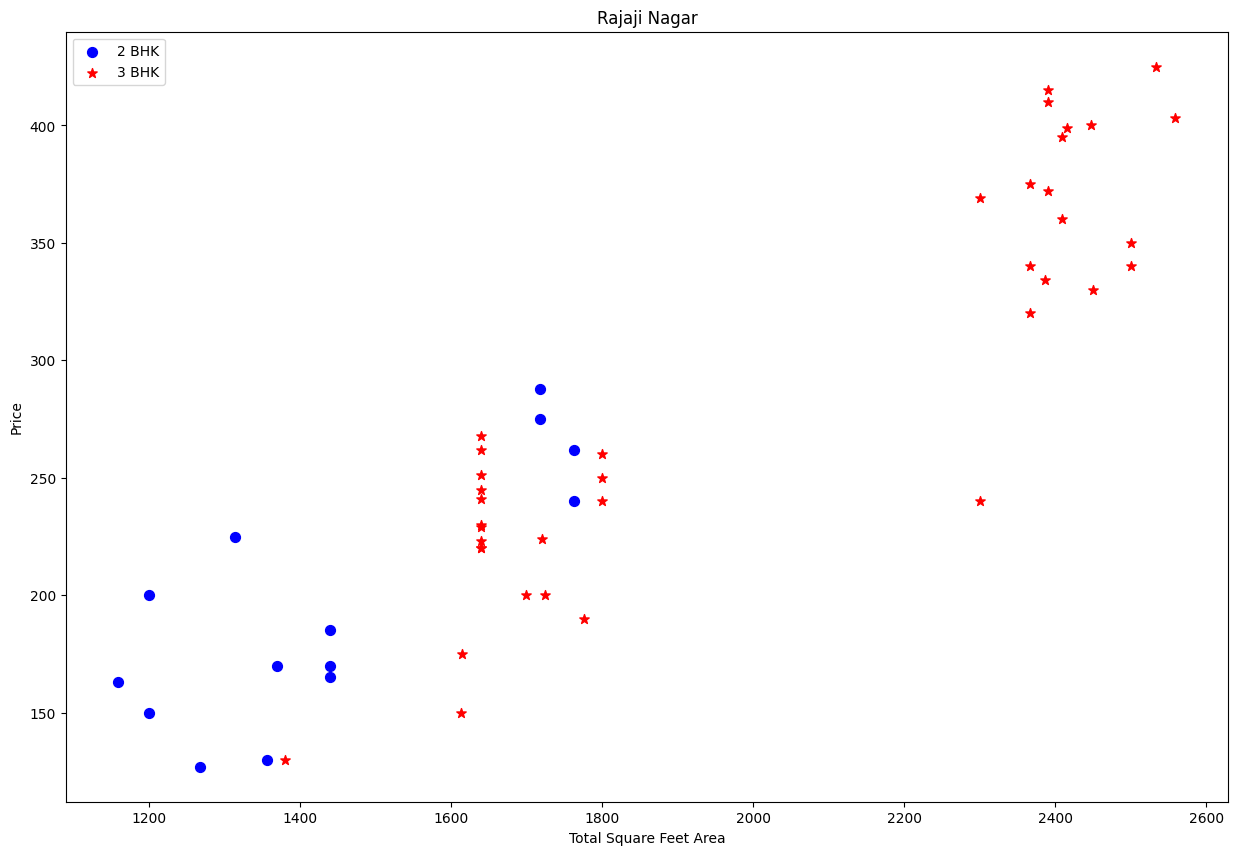

In [76]:
plot_scatter_chart(df1,'Rajaji Nagar')

In [77]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')   

In [78]:
df1=remove_bhk_outliers(df1)

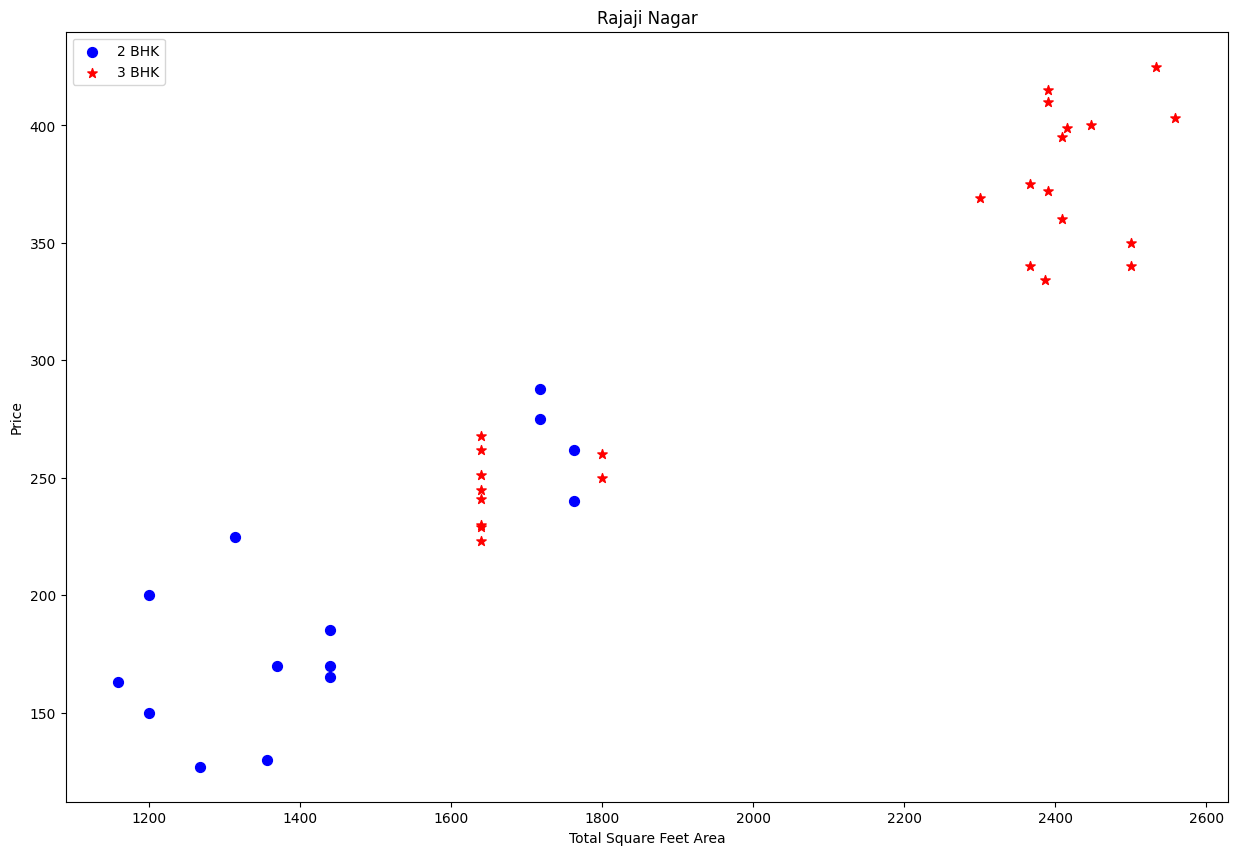

In [79]:
plot_scatter_chart(df1,'Rajaji Nagar')

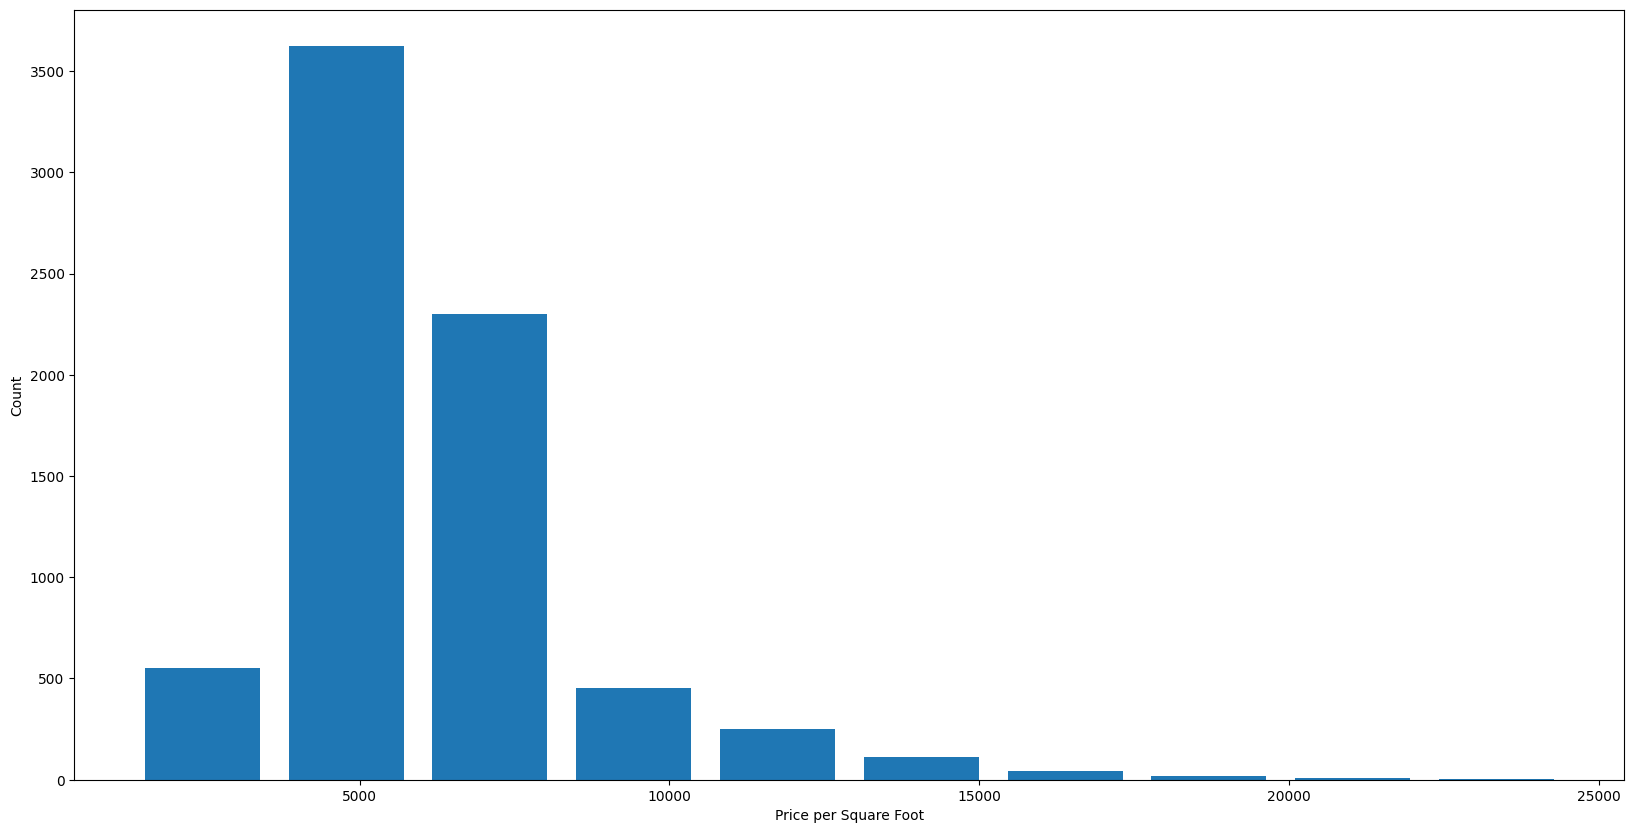

In [80]:
plt.figure(figsize=(20,10))
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Square Foot')
plt.ylabel('Count')
plt.show()

In [81]:
df1.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

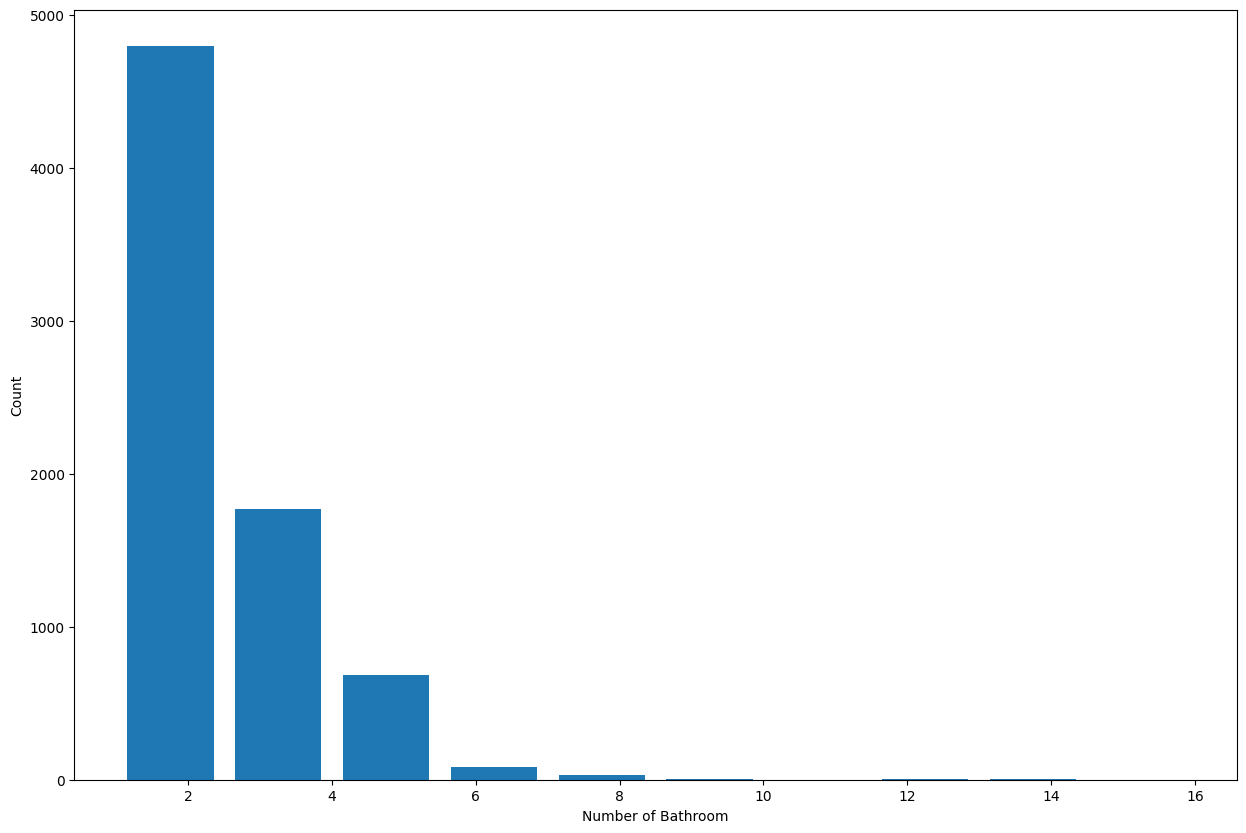

In [82]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [83]:
df.bath.mean()

2.6926096474673513

In [84]:
df1[df1.bath>10]

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9,3300.0,15151.515152
5344,Neeladri Nagar,10 BHK,4000,12.0,160.0,10,4000.0,4000.000000
8547,others,10 BHK,12000,12.0,525.0,10,12000.0,4375.000000
8633,others,16 BHK,10000,16.0,550.0,16,10000.0,5500.000000
9329,others,11 BHK,6000,12.0,150.0,11,6000.0,2500.000000
9642,others,13 BHK,5425,13.0,275.0,13,5425.0,5069.124424


In [85]:
df1[df1.bath>df1.bhk+2]

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9,3300.0,15151.515152
1642,Chikkabanavar,4 Bedroom,2460,7.0,80.0,4,2460.0,3252.032520
5305,Nagasandra,4 Bedroom,7000,8.0,450.0,4,7000.0,6428.571429
6792,Thanisandra,3 BHK,1806,6.0,116.0,3,1806.0,6423.034330
8476,others,6 BHK,11338,9.0,1000.0,6,11338.0,8819.897689


In [86]:
df1=df1[df1.bath<df1.bhk+2]
df1.head()

,location,size,total_sqft,bath,price,bhk,total_sqft_avg,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,1235.0,11983.805668


In [87]:
df1.shape

(7291, 8)

In [88]:
df1=df1.drop(['size','price_per_sqft','total_sqft'],axis='columns')
df1.head()

,location,bath,price,bhk,total_sqft_avg
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7291 entries, 0 to 10221
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7291 non-null   object 
 1   bath            7291 non-null   float64
 2   price           7291 non-null   float64
 3   bhk             7291 non-null   int64  
 4   total_sqft_avg  7291 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 341.8+ KB


In [90]:
df1.head()

,location,bath,price,bhk,total_sqft_avg
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


In [91]:
dummies=pd.get_dummies(df1.location,dtype=int)
dummies.head()  

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df1=pd.concat([df1,dummies.drop('others',axis='columns')],axis='columns')
df1.head()

,location,bath,price,bhk,total_sqft_avg,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df1.columns

Index(['location', 'bath', 'price', 'bhk', 'total_sqft_avg',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=259)

In [94]:
df_final=df1.drop('location',axis='columns')
df_final.head()

,bath,price,bhk,total_sqft_avg,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_final.to_csv('bengaluru_house_cleaned_csv',index=False)

Model Independent and dependent variables

In [ ]:
X=df_final.drop(['price'],axis='columns')
y=df_final['price']

In [ ]:
X.shape,y.shape

((7291, 257), (7291,))

Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
y_predict=linear_reg.predict(X_test)
score=linear_reg.score(X_test,y_test)
print(score)

0.8335225333231499


Check Score of a model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
r2_score=r2_score(y_test,y_predict)

print(mae)
print(mse)
print(r2_score*100)

17.957101991660775
1213.604605752522
83.35225333231499


K-Flod cross validation 

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.84107602, 0.84310502, 0.89592021, 0.8749652 , 0.84405386])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
   algos={
      'linear_regression':{
         'model':LinearRegression(),
         'params':{
            'positive':[True,False]
         }
      },
      'lasso':{
         'model':Lasso(),
         'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
         }
      },
      'decision_tree':{
         'model':DecisionTreeRegressor(),
         'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
         }
      }
   }

   scores=[]
   cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
   for algo_name,config in algos.items():
      gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
      gs.fit(X,y)
      scores.append({
         'model':algo_name,
         'best_score':gs.best_score_,
         'best_params':gs.best_params_
      })
   return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853445,{'positive': False}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.728248,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linear_reg,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))